# One click for InferCNV-like results (~3min)
CNA detection in 600 10x single cells with XClone RDR module, Use **CellRanger** matrix as input.

In [1]:
# !mkdir data
# !wget https://raw.githubusercontent.com/Rongtingting/xclone-data/main/GX109-T1c_600cells_workshop2024/rdr_cellranger.tar.gz -O data/rdr_cellranger.tar.gz
# !cd data; tar -xzf rdr_cellranger.tar.gz
# !mkdir result
# !ls -l data/rdr_cellranger

mkdir: cannot create directory ‘data’: File exists
--2024-07-07 22:11:53--  https://raw.githubusercontent.com/Rongtingting/xclone-data/main/GX109-T1c_600cells_workshop2024/rdr_cellranger.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5032427 (4.8M) [application/octet-stream]
Saving to: ‘data/rdr_cellranger.tar.gz’

100%[======================================>] 5,032,427   83.9KB/s   in 60s    

2024-07-07 22:12:55 (81.3 KB/s) - ‘data/rdr_cellranger.tar.gz’ saved [5032427/5032427]

mkdir: cannot create directory ‘result’: File exists
total 19326
-rw-r----- 1 rthuang yuanhua    11400 Jul  4 14:56 barcodes.tsv
-rw-r----- 1 rthuang yuanhua    36861 Jul  4 15:13 cell_anno.tsv
-rw-r----- 1 rthuang yuanhua   508187 Jul  4 14:56 genes.tsv
-rw-r----- 1 rthuan

In [2]:

# !pip install git+https://github.com/single-cell-genetics/XClone

In [3]:
import numpy as np
import scanpy as sc

In [4]:
import xclone

(Running XClone 0.3.9)
2024-07-07 14:16:30


In [5]:
rdr_dir = "./data/rdr_cellranger/"
cell_anno_file = "./data/rdr_cellranger/cell_anno.tsv"
out_dir = "./result/"

## Load data

In [6]:

RDR_adata = xclone.pp.readrdr_mtx(rdr_dir)

RDR_adata = xclone.pp.extra_anno(
    RDR_adata,
    cell_anno_file,
    barcodes_key = "cell",
    cell_anno_key = "cell_type",
    sep = "\t"
)

RDR_adata

/home/rthuang/Github_repos/XClone/xclone/preprocessing/_data.py:339: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  Xadata.uns["log"] = dict([('init_data', str(Xadata.shape))])
/home/rthuang/anaconda3/envs/xclone_dev/lib/python3.9/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 600 × 21604
    obs: 'cell_type', 'UMAP1', 'UMAP2'
    var: 'gene_ids', 'GeneName', 'GeneID', 'chr', 'start', 'stop', 'arm', 'chr_arm', 'band'
    uns: 'log'
    layers: 'raw_expr'

## UMAP Plotting

In [7]:
RDR_adata.obsm["X_umap"] = np.zeros(RDR_adata.shape)
RDR_adata.obsm["X_umap"][:, 0] = RDR_adata.obs["UMAP1"]
RDR_adata.obsm["X_umap"][:, 1] = RDR_adata.obs["UMAP2"]
RDR_adata.obsm["X_umap"]

array([[16.635555 , 14.148827 ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 2.922446 ,  2.2291386,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [10.806649 , 13.686811 ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       ...,
       [16.76189  , -1.7887295,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [15.841233 ,  7.652854 ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [14.759416 , -2.370602 ,  0.       , ...,  0.       ,  0.       ,
         0.       ]])

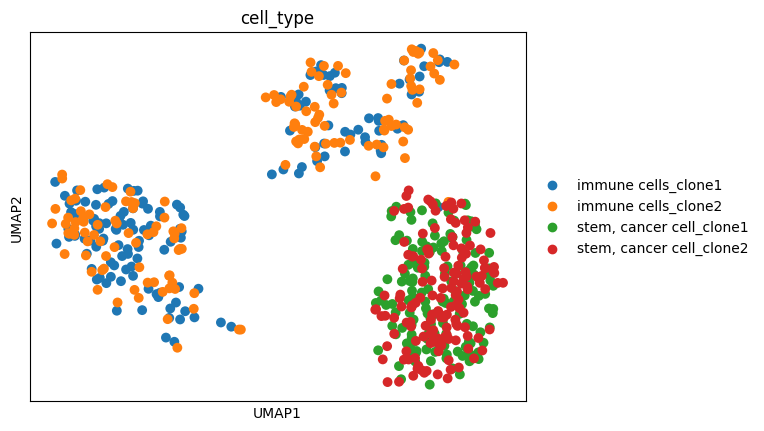

In [8]:
sc.pl.umap(RDR_adata, color = "cell_type")

## RDR module

In [9]:
dataset_name = "10x_600cell"

xconfig = xclone.XCloneConfig(
    dataset_name = dataset_name,
    module = "RDR"
)

xconfig.set_figure_params(xclone= True, fontsize = 18)
xconfig.outdir = out_dir
xconfig.cell_anno_key = "cell_type"
xconfig.ref_celltype = "immune cells_clone1"
xconfig.top_n_marker = 25
xconfig.marker_group_anno_key = "cell_type"
xconfig.xclone_plot= True
xconfig.plot_cell_anno_key = "cell_type"
xconfig.trans_t = 1e-6
xconfig.start_prob = np.array([0.3, 0.4, 0.3])
xconfig.display()

RDR 
Configurations:
HMM_brk                        chr_arm
KNN_neighbors                  10
WMA_smooth_key                 chr_arm
WMA_window_size                40
_file_format_data              h5ad
_file_format_figs              pdf
_frameon                       True
_outdir                        result
_plot_suffix                   
_start                         1720361857.798899
_vector_friendly               True
cell_anno_key                  cell_type
dataset_name                   10x_600cell
dispersion_celltype            None
exclude_XY                     False
file_format_data               h5ad
file_format_figs               pdf
filter_ref_ave                 0.5
fit_GLM_libratio               False
gene_exp_group                 1
gene_exp_ref_log               True
get_marker_genes               True
guide_chr_anno_key             chr_arm
guide_cnv_ratio                None
guide_qt_lst                   [0.0001, 0.96, 0.99]
marker_group_anno_key          cell_typ

[XClone RDR module running]************************
[XClone data preprocessing] check RDR raw dataset value: success
Keep valid cells: Filter out 0 cells / 600 total cells, remain 600 valid cells with annotation
[XClone data preprocessing] check RDR cell annotation: success
[XClone-RDR preprocessing] Filter out 11609 genes / 21604 total genes, remain 9995 genes
[XClone data preprocessing] detect RDR genes: done
filter_ref_ave_recomend 0.07999999821186066
[XClone-RDR preprocessing] Filter out 3087 genes / 9995 total genes, remain 6908 genes
[XClone-RDR preprocessing] Filter out 0 cells / 600 total cells, remain 600 cells
[XClone] use marker genes provided by users: 
 ['AGR2' 'ANXA5' 'APP' 'ARHGDIB' 'B2M' 'BTG1' 'CD37' 'CD44' 'CD53' 'CD9'
 'CLDN4' 'CLDN7' 'CLEC2B' 'CORO1A' 'COTL1' 'CYSTM1' 'DOK2' 'DSTN' 'GMFG'
 'GSTP1' 'HCLS1' 'HLA-DPA1' 'HLA-DPB1' 'HLA-DQA1' 'HLA-E' 'HMGA1' 'HSPA1A'
 'IGFBP2' 'ITGA6' 'ITGB2' 'KRT18' 'KRT8' 'LAPTM5' 'LCN2' 'LCP1' 'LCP2'
 'LSP1' 'LYZ' 'MARCKSL1' 'MDK' 'NR

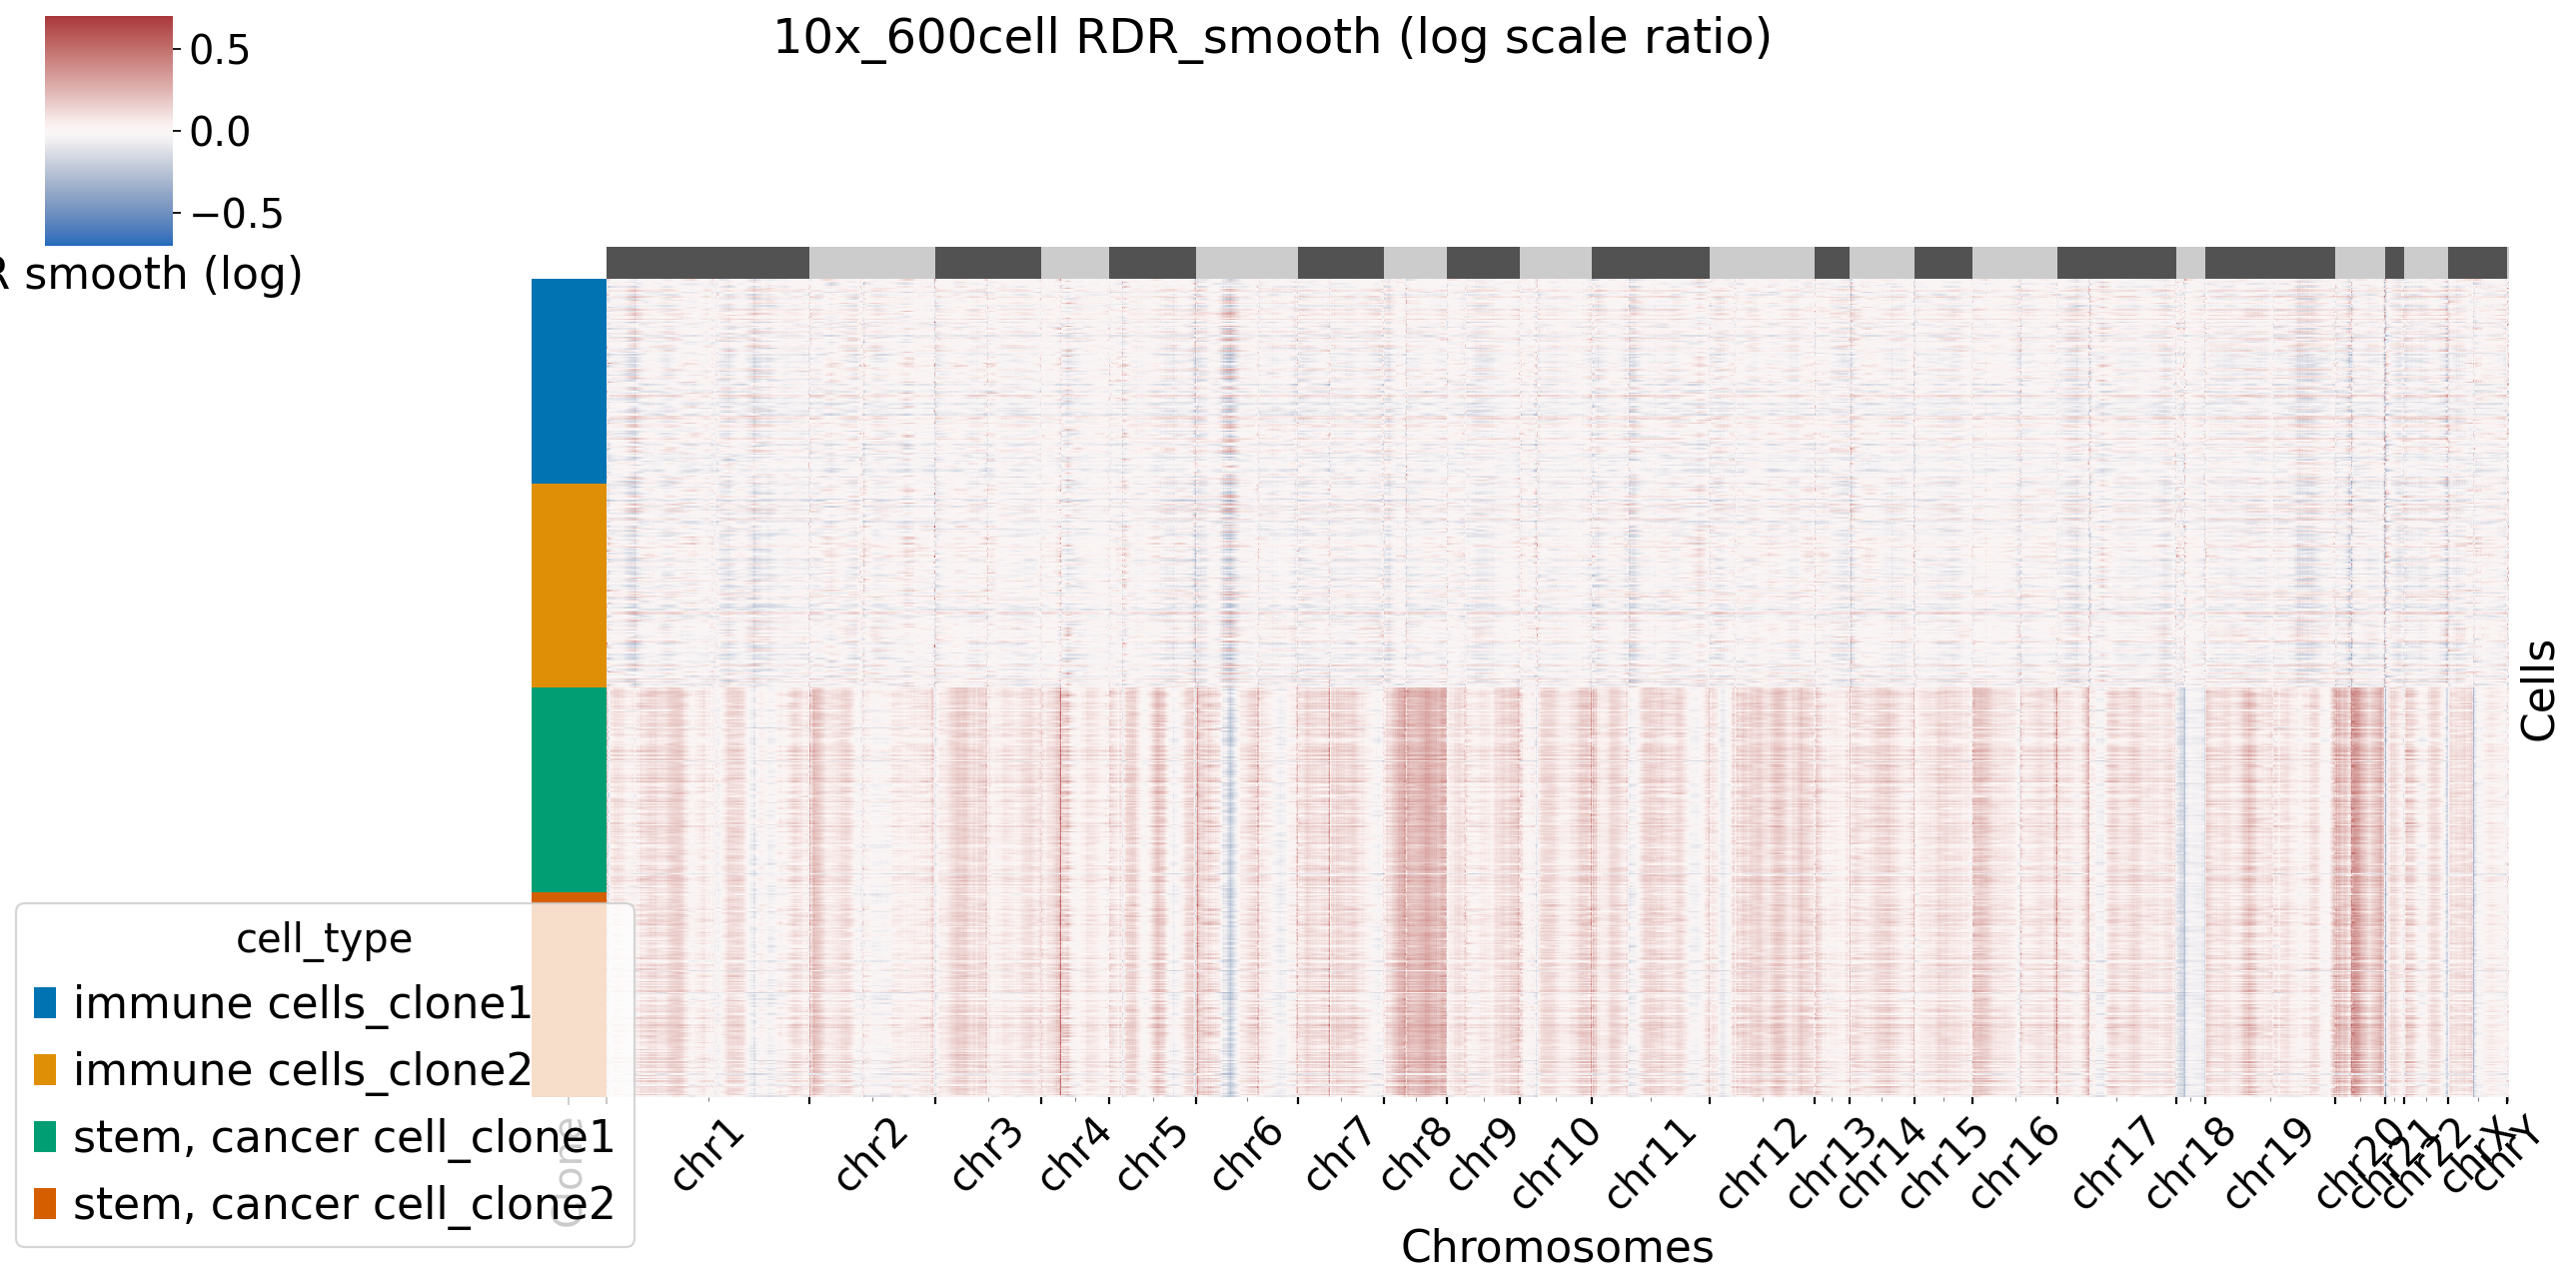

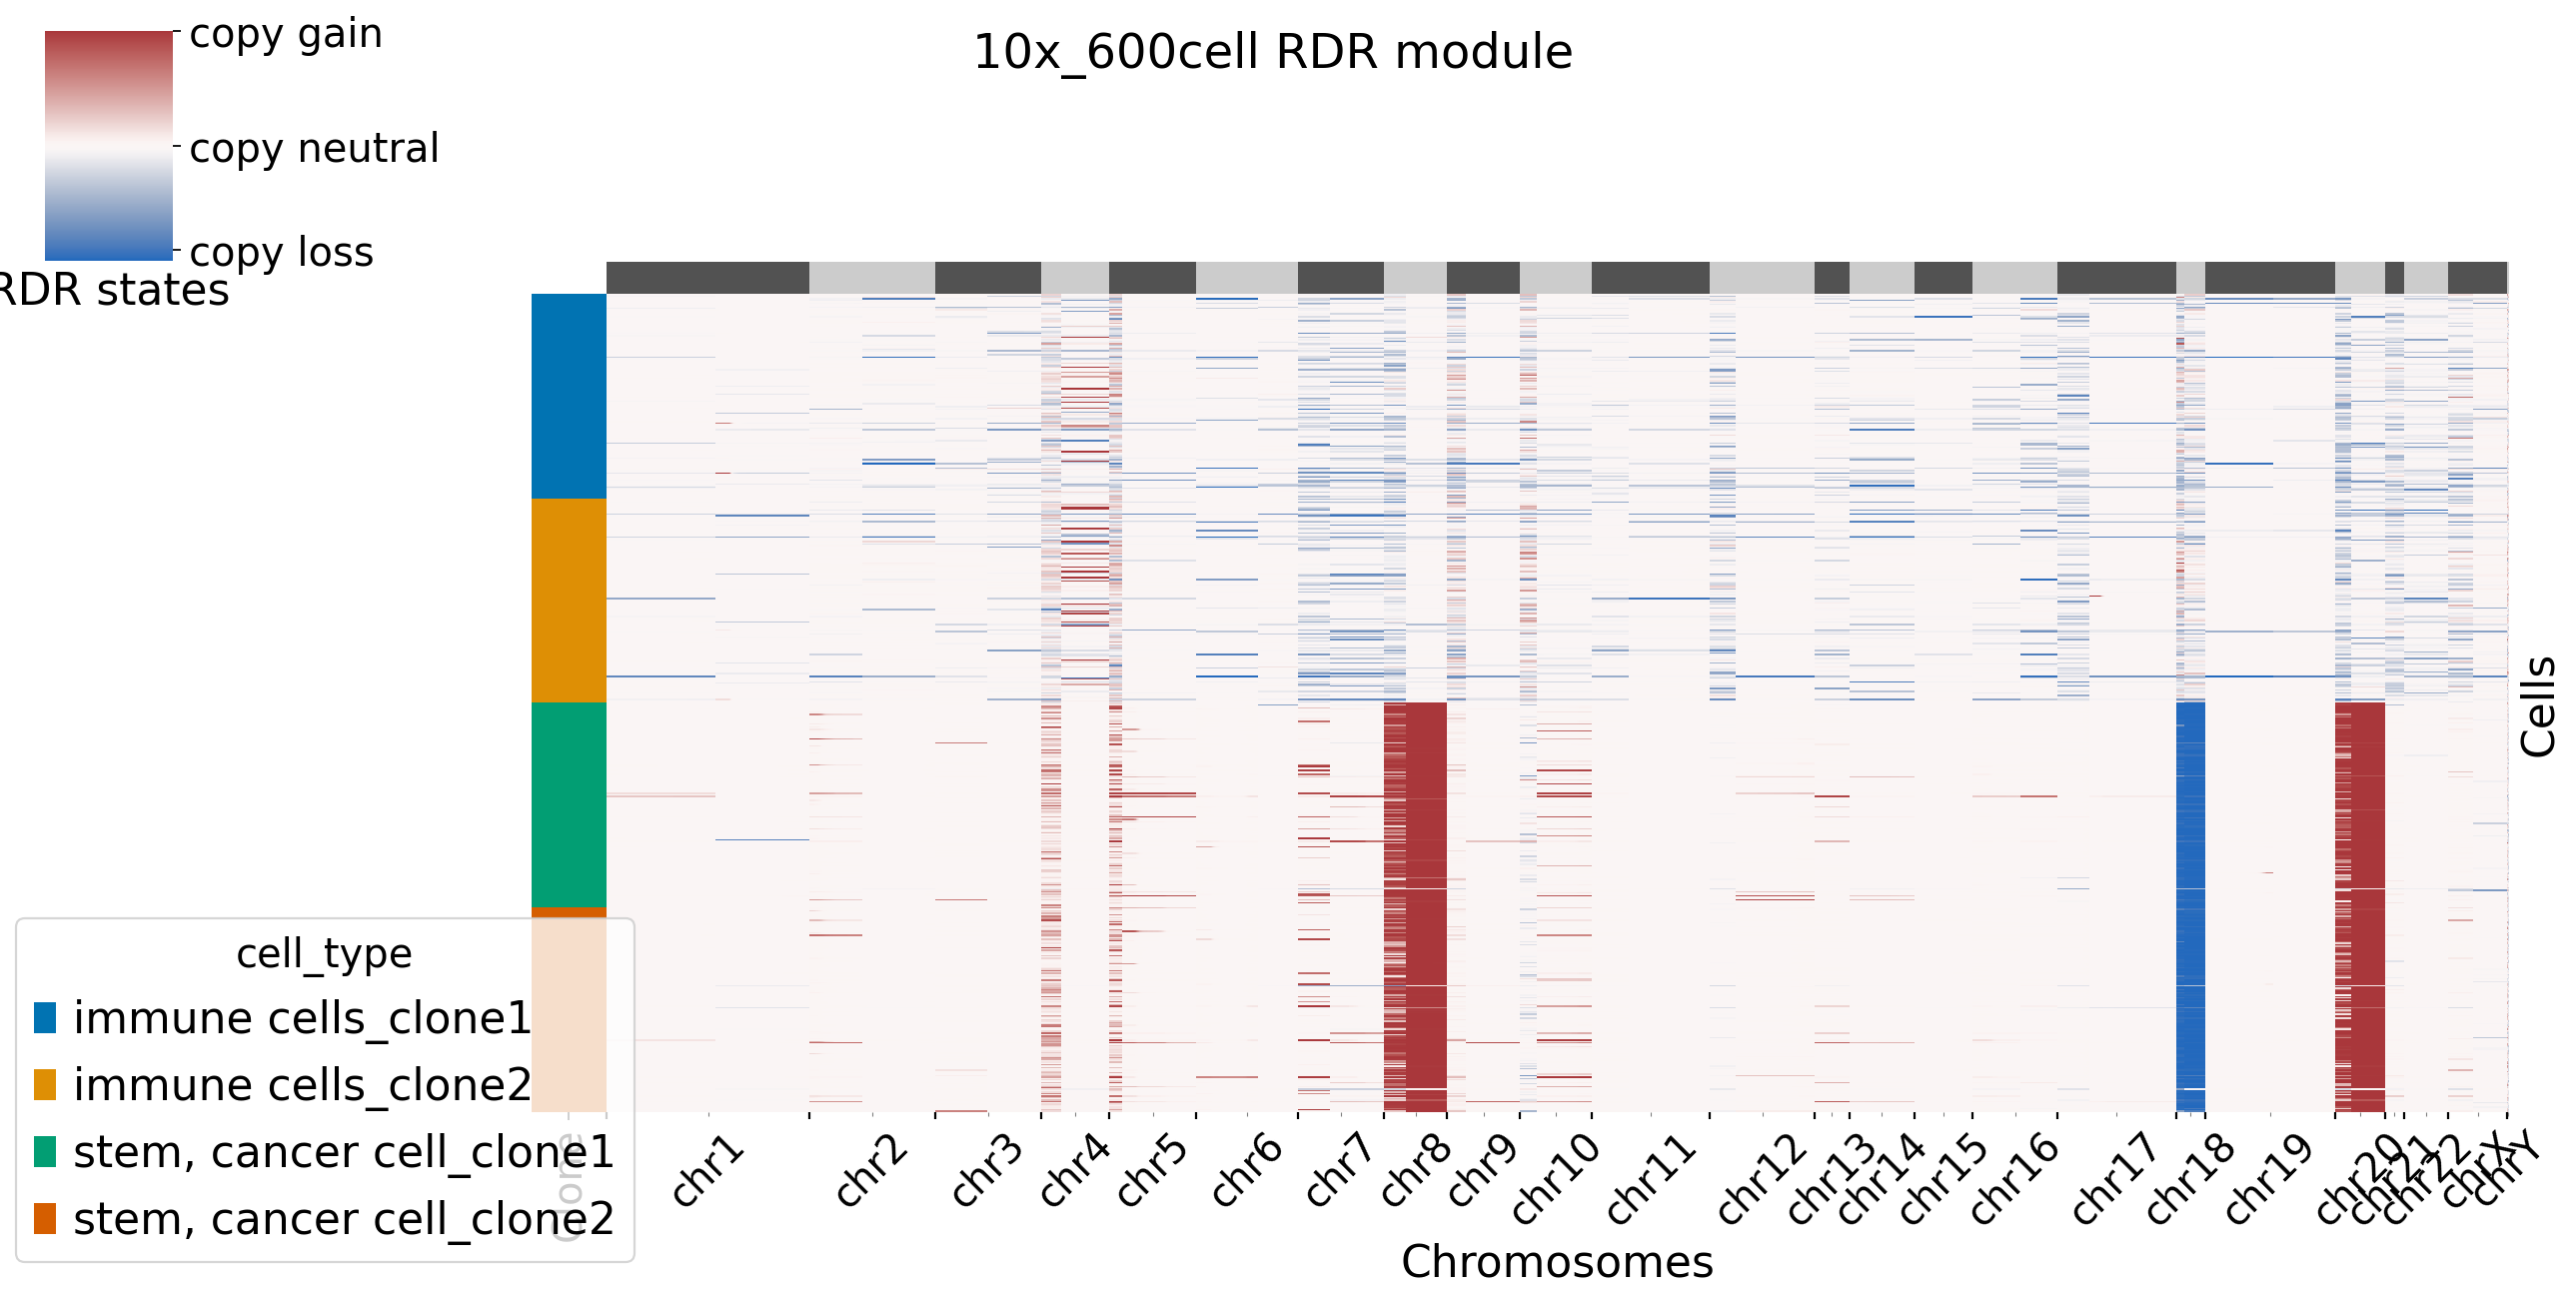

In [10]:
RDR_Xdata = xclone.model.run_RDR(RDR_adata, config_file = xconfig)